# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=matric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shimoda
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | zhashkiv
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | tikapur
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | meulaboh
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | sambava
Processing Record 16 of Set 1 | elat
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | zhanakorgan
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | neiafu


Processing Record 37 of Set 4 | bourail
Processing Record 38 of Set 4 | ca mau
Processing Record 39 of Set 4 | dallas
Processing Record 40 of Set 4 | camana
Processing Record 41 of Set 4 | karaul
City not found. Skipping...
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 4 | luanda
Processing Record 45 of Set 4 | ushtobe
Processing Record 46 of Set 4 | majene
Processing Record 47 of Set 4 | upernavik
Processing Record 48 of Set 4 | keflavik
Processing Record 49 of Set 4 | lahat
Processing Record 0 of Set 5 | taoudenni
Processing Record 1 of Set 5 | tasiilaq
Processing Record 2 of Set 5 | tunceli
Processing Record 3 of Set 5 | banda aceh
Processing Record 4 of Set 5 | yumen
Processing Record 5 of Set 5 | ponta delgada
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | fare
Processing Record 8 of Set 5 | doha
Processing Record 9 of Set 5 | benguela
Processing Record 10 of Se

Processing Record 26 of Set 8 | qasigiannguit
Processing Record 27 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 28 of Set 8 | khani
Processing Record 29 of Set 8 | srednekolymsk
Processing Record 30 of Set 8 | general pico
Processing Record 31 of Set 8 | jawhar
Processing Record 32 of Set 8 | sarh
Processing Record 33 of Set 8 | kushiro
Processing Record 34 of Set 8 | moshi
Processing Record 35 of Set 8 | sao filipe
Processing Record 36 of Set 8 | isangel
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | touros
Processing Record 39 of Set 8 | audru
Processing Record 40 of Set 8 | antofagasta
Processing Record 41 of Set 8 | fukue
Processing Record 42 of Set 8 | lagoa
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | redlands
Processing Record 45 of Set 8 | bandar-e lengeh
Processing Record 46 of Set 8 | grootfontein
Processing Record 47 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 48 of Set 8 | mac

Processing Record 12 of Set 12 | west wendover
Processing Record 13 of Set 12 | zyryanka
Processing Record 14 of Set 12 | shubarshi
Processing Record 15 of Set 12 | kaeo
Processing Record 16 of Set 12 | marzuq
Processing Record 17 of Set 12 | te anau
Processing Record 18 of Set 12 | houma
Processing Record 19 of Set 12 | gornopravdinsk
Processing Record 20 of Set 12 | kristiinankaupunki
Processing Record 21 of Set 12 | petropavlovka
Processing Record 22 of Set 12 | marshall
Processing Record 23 of Set 12 | ilhabela
Processing Record 24 of Set 12 | lucea
Processing Record 25 of Set 12 | lolua
City not found. Skipping...
Processing Record 26 of Set 12 | chegdomyn
Processing Record 27 of Set 12 | mvuma
Processing Record 28 of Set 12 | de-kastri
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | belaya gora
Processing Record 31 of Set 12 | salinopolis
Processing Record 32 of Set 12 | los chiles
Processing Record 33 of Set 12 | mosquera
Processing Record 34 of Set 

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shimoda,34.6667,138.9500,277.65,77,77,4.59,JP,1675442252
1,zhashkiv,49.2454,30.1102,271.40,86,100,3.52,UA,1675442253
2,severo-kurilsk,50.6789,156.1250,270.42,74,100,5.04,RU,1675442253
3,tikapur,28.5000,81.1333,286.99,56,0,1.08,NP,1675442254
4,bengkulu,-3.8004,102.2655,297.76,88,88,2.75,ID,1675442254


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shimoda,34.6667,138.9500,277.65,77,77,4.59,JP,1675442252
1,zhashkiv,49.2454,30.1102,271.40,86,100,3.52,UA,1675442253
2,severo-kurilsk,50.6789,156.1250,270.42,74,100,5.04,RU,1675442253
3,tikapur,28.5000,81.1333,286.99,56,0,1.08,NP,1675442254
4,bengkulu,-3.8004,102.2655,297.76,88,88,2.75,ID,1675442254


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

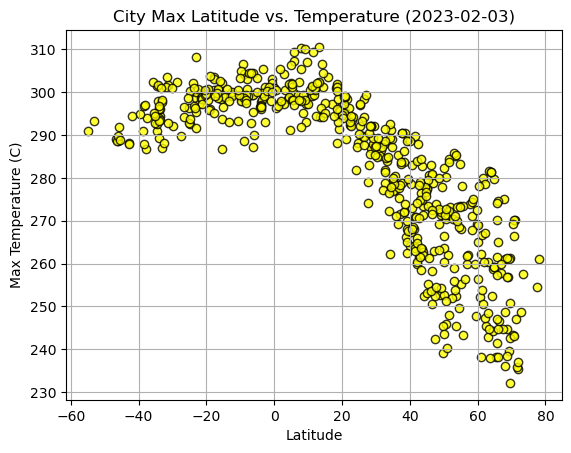

In [71]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],color = "yellow", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

* The above plot shows that the max temperature varies as the latitude varies. As the distance of the cities from the equater changes, the max temperature of that cities changes. 

#### Latitude Vs. Humidity

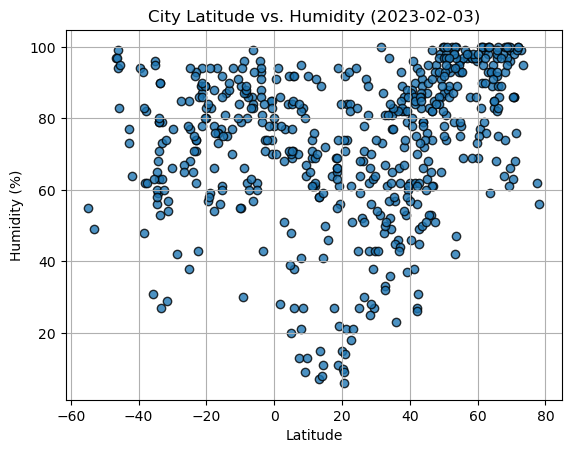

In [70]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

* The above plot shows the relation between humidity and the city latitude. Here there is no corelation between northern and southern latitude and humidity of the city. The graph shows that maximum humidity is in northern hemisphere.

#### Latitude Vs. Cloudiness

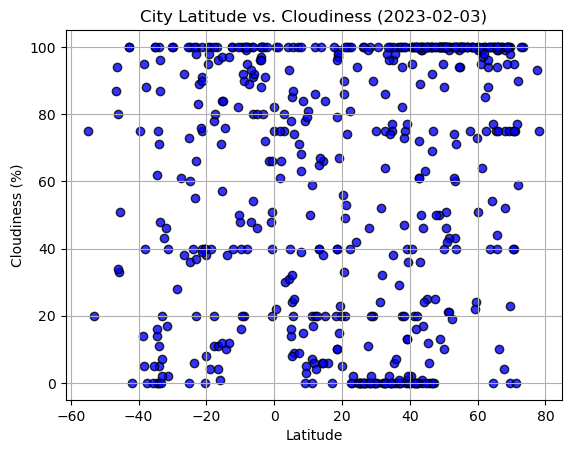

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],color = "blue", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Cities")

date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

* The above graph shows relationship between cloudiness and latitude of cities. Here, there is no corelation between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

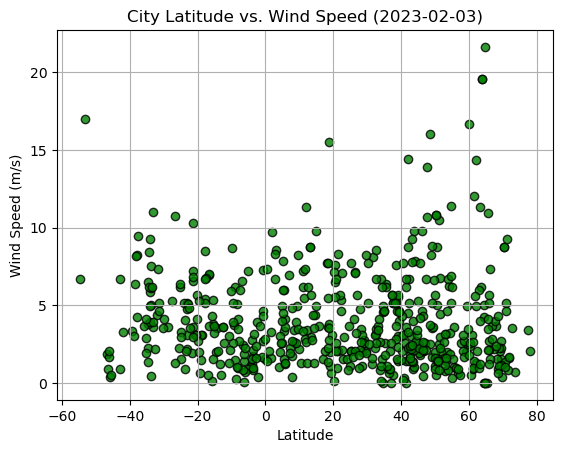

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],color = "green", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Cities")

date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

* The above graph shows relation between wind speed and latitude. The plot shows no corelation between wind speed and latitude of the cities.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [141]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value , regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show
    

In [97]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shimoda,34.6667,138.9500,277.65,77,77,4.59,JP,1675442252
1,zhashkiv,49.2454,30.1102,271.40,86,100,3.52,UA,1675442253
2,severo-kurilsk,50.6789,156.1250,270.42,74,100,5.04,RU,1675442253
3,tikapur,28.5000,81.1333,286.99,56,0,1.08,NP,1675442254
5,cherskiy,68.7500,161.3000,244.64,100,100,0.90,RU,1675442121


In [98]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bengkulu,-3.8004,102.2655,297.76,88,88,2.75,ID,1675442254
7,ushuaia,-54.8000,-68.3000,290.96,55,75,6.69,AR,1675442079
12,sambava,-14.2667,50.1667,299.27,87,10,3.51,MG,1675442256
14,hermanus,-34.4187,19.2345,298.04,59,0,8.42,ZA,1675442257
15,vaini,-21.2000,-175.2000,298.24,94,75,7.20,TO,1675442257


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.717978365061688


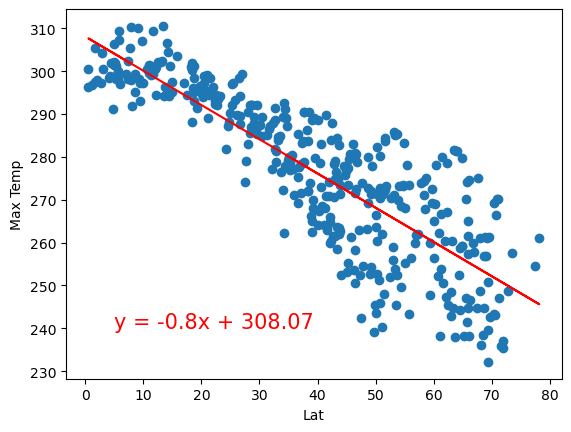

In [163]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (5,240))

The r-value is 0.24527324658561916


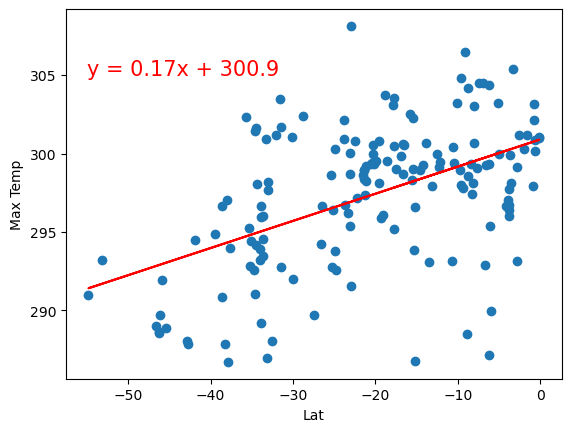

In [146]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,305))

**Discussion about the linear relationship:** 
* In northern hemisphere, there is a negative corelation between maximum temperature and latitude. The maximum temperature decreases as the location of city goes away north from the equator. 
* In southern hemisphere, there is a positive corelation between maximum temperature and latitude. The maximum temperature increases as the location of city gets near the equator from south side. Also the maximum temperature varies a lot in southern hemisphere cities compared to northern hemispere cities

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.24167680145773593


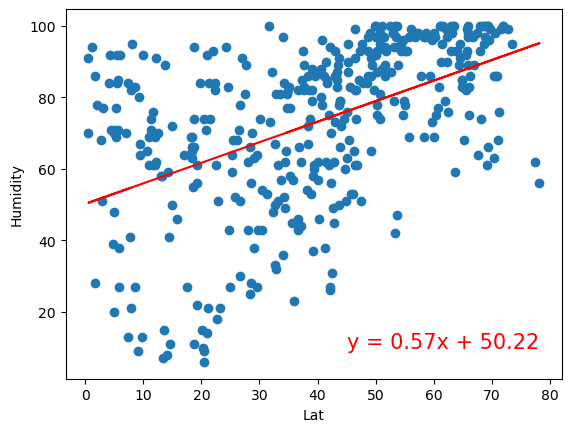

In [155]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45,10))

The r-value is 0.027396743459919236


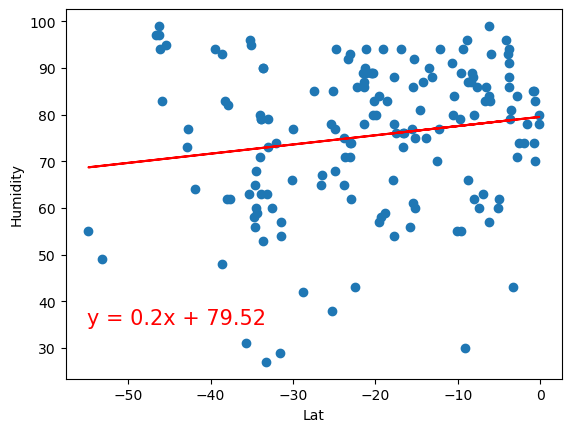

In [153]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,35))

**Discussion about the linear relationship:** 
* In northern hemisphere, there is vrey less corelation between humidity and latitude. Higher level of humidity is observed in the cities located north side of the northern hemisphere . 
* In southern hemisphere, there is no corelation between humidity and latitude. However, higher level of humidity is observed in the cities close to equator compared to the south part of soutern hemisphere cities.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.10536491563224679


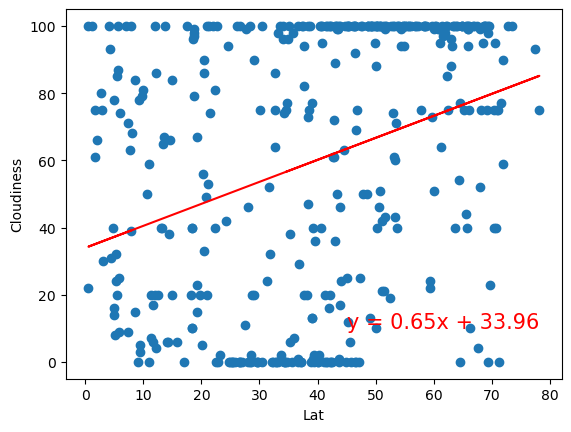

In [157]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (45,10))

The r-value is 0.08348478339375688


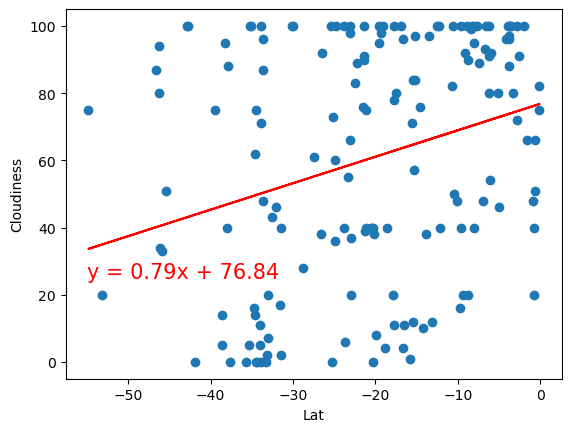

In [160]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,25))

**Discussion about the linear relationship:** 
* In northern hemisphere, there is no corelation between cloudiness and latitude. The cloudiness levels are widely spread across all the latitudes. 
* In southern hemisphere, there is no corelation between cloudiness and latitude. The cloudiness levels are widely spread across all the latitudes

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.000572184238286577


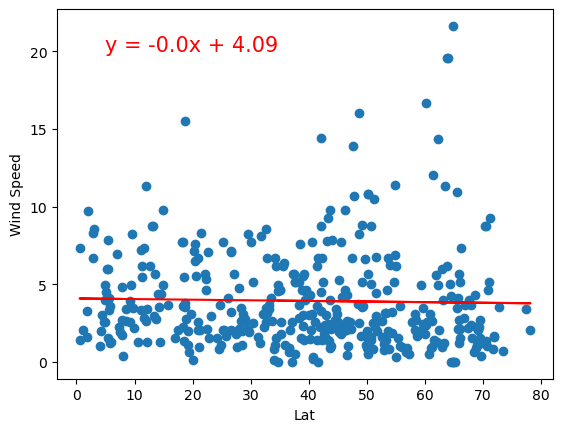

In [161]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (5,20))

The r-value is 0.08856159132132509


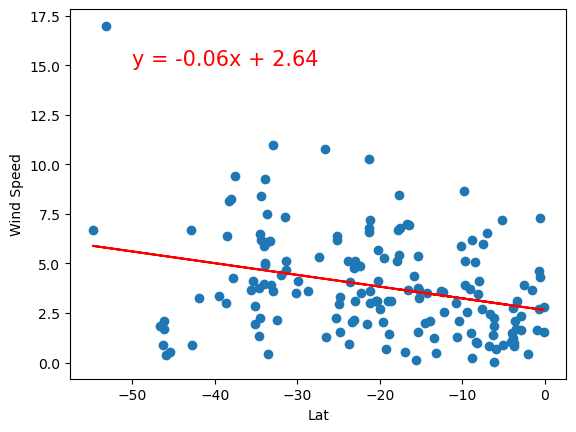

In [162]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,15))

**Discussion about the linear relationship:** 
* In northern hemisphere, there is no corelation at all between wind speed and latitude. Most of the cities are having different wind speeds in the range of 0 to 10 mph.
* In southern hemisphere, there is very less negative corelation between wind speed and latitude. There is a slight increase in the wind speed of cities located away from the equator in south.